    # Mean reverting  analyis of Time series data of Relaince  Return at 1 minute time frame using

    *   **Augmented Dickey-Fuller Test**
    *   **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**
    *    **Phillips-Perron (PP) Test**



    So basically to  analyse  the mean reverting level.We need to check wheter the data is stationary or not. That is the reason, the above three test are used.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:

df = pd.read_csv('reliance.csv')
df['return'] = df['RELIANCE-EQ'].pct_change()
df.dropna(inplace=True)



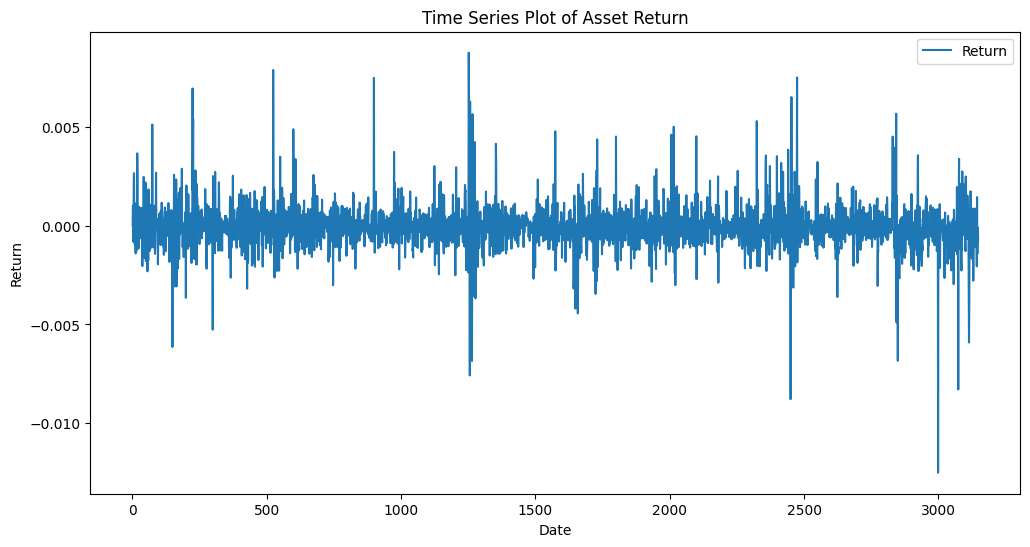

In [8]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['return'], label='Return')
plt.title('Time Series Plot of Asset Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


In [15]:
test_ = {}

# **Checking Unite Root Problem**
### If ther is unit root problem means there is not mean reverting level
### Ho = There is unitroot problem
### Ha = There is no unitroot problem

In [16]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series, title=''):
    global test_
    """
    Perform Augmented Dickey-Fuller test and print results.
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    for value, label in zip(result[:4], labels):
        print(f'{label}: {value}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] < 0.05:
        test_.update({'adfuller':'Rejected Ho'})
        print("=> Reject the null hypothesis. The series is stationary.")
    else:
        test_.update({'adfuller':'Fail to Rejected Ho'})
        print("=> Fail to reject the null hypothesis. The series is non-stationary.")
    print('\n')

# Perform ADF Test on Return Series
perform_adf_test(df['return'], 'Return Series')

Augmented Dickey-Fuller Test: Return Series
ADF Statistic: -16.781649199010186
p-value: 1.2627894009890004e-29
# Lags Used: 10
# Observations Used: 3137
Critical Value (1%): -3.432436279580521
Critical Value (5%): -2.8624617895332967
Critical Value (10%): -2.5672606902905657
=> Reject the null hypothesis. The series is stationary.




In [17]:
from statsmodels.tsa.stattools import kpss

def perform_kpss_test(series, **kw):
    """
    Perform KPSS test and print results.
    """
    print('KPSS Test:')
    statistic, p_value, lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {lags}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}')

    if p_value < 0.05:
        statement = "=> Reject the null hypothesis. The series is non-stationary."
        test_.update({'kpss':'Rejected Ho'})
    else:
        statement = "=> Fail to reject the null hypothesis. The series is stationary."
        test_.update({'kpss':'Fail to Rejected Ho'})
    print(statement)

# Perform KPSS Test on Return Series
perform_kpss_test(df['return'], regression='c')  # 'c' for level stationarity


KPSS Test:
KPSS Statistic: 0.49288824861882913
p-value: 0.043268412473236685
Num Lags: 4
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739
=> Reject the null hypothesis. The series is non-stationary.


In [18]:
from arch.unitroot import PhillipsPerron

def perform_pp_test(series, title=''):
    """
    Perform Phillips-Perron test and print results.
    """
    print(f'Phillips-Perron Test: {title}')
    result = PhillipsPerron(series, )
    p_value = result.pvalue
    if p_value < 0.05:
        test_.update({'PhillipsPerron':'Rejected Ho'})
        statement = 'Rejected Ho'
    else:
        statement = 'Fail to Rejected Ho'
        test_.update({'PhillipsPerron':'Fail to Rejected Ho'})
    print(result)
    print("*"*60)
    print(statement)
    labels = ['PP Statistic', 'p-value', '# Lags Used', '# Observations Used']
    


# Perform PP Test on Return Series
perform_pp_test(df['return'], 'Return Series')


Phillips-Perron Test: Return Series
     Phillips-Perron Test (Z-tau)    
Test Statistic                -55.063
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Rejected Ho


In [19]:
test_

{'adfuller': 'Rejected Ho',
 'kpss': 'Rejected Ho',
 'PhillipsPerron': 'Rejected Ho'}

In [20]:
#An all the three test have rejected the Ho means there is
#no unitroot problem which indirectly implies that the reliance
#returns are meanreverting
